<a href="https://colab.research.google.com/github/a22106/ImageClassification/blob/main/ImageSegmentation/mmDet2DMask2former.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mmDetection2D Mask2former
## Installation

In [1]:
!pip install -U openmim
!mim install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 3.6 MB/s 
     |████████████████████████████████| 235 kB 14.0 MB/s 
     |████████████████████████████████| 51 kB 8.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.1 MB 188 kB/s 
     |████████████████████████████████| 190 kB 7.6 MB/s 


In [2]:
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection
!pip install -v -e .
# "-v" means verbose, or more output
# "-e" means installing a project in editable mode,
# thus any local modifications made to the code will take effect without reinstallation.
!pip install mmdet


Cloning into 'mmdetection'...
remote: Enumerating objects: 25032, done.
remote: Total 25032 (delta 0), reused 0 (delta 0), pack-reused 25032
Receiving objects: 100% (25032/25032), 37.81 MiB | 30.73 MiB/s, done.
Resolving deltas: 100% (17543/17543), done.
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://g

## Verify the installation

In [3]:
import mmdet
print(mmdet.__version__)
# Example output: 2.23.0

2.25.0


## download checkpoints, config


In [4]:
# %mkdir data && mkdir val2017
# !unzip /content/drive/MyDrive/data/coco/val2017.zip -d ./data/val2017

In [5]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask2former/mask2former_swin-l-p4-w12-384-in21k_lsj_16x1_100e_coco-panoptic/mask2former_swin-l-p4-w12-384-in21k_lsj_16x1_100e_coco-panoptic_20220407_104949-d4919c44.pth \
      -O checkpoints/mask2former_swin-l-p4-w12-384-in21k_lsj_16x1_100e_coco-panoptic_20220407_104949-d4919c44.pth

--2022-07-16 15:11:12--  https://download.openmmlab.com/mmdetection/v2.0/mask2former/mask2former_swin-l-p4-w12-384-in21k_lsj_16x1_100e_coco-panoptic/mask2former_swin-l-p4-w12-384-in21k_lsj_16x1_100e_coco-panoptic_20220407_104949-d4919c44.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.85
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 866336748 (826M) [application/octet-stream]
Saving to: ‘checkpoints/mask2former_swin-l-p4-w12-384-in21k_lsj_16x1_100e_coco-panoptic_20220407_104949-d4919c44.pth’

checkpoints/mask2fo 100%[===================>] 826.20M  11.5MB/s    in 75s     

2022-07-16 15:12:28 (11.0 MB/s) - ‘checkpoints/mask2former_swin-l-p4-w12-384-in21k_lsj_16x1_100e_coco-panoptic_20220407_104949-d4919c44.pth’ saved [866336748/866336748]





#set config, models



In [6]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

In [10]:
%cd mmdetection
# choose to use a config
config = 'configs/mask2former/mask2former_swin-l-p4-w12-384-in21k_lsj_16x1_100e_coco-panoptic.py'
checkpoint = '/content/checkpoints/mask2former_swin-l-p4-w12-384-in21k_lsj_16x1_100e_coco-panoptic_20220407_104949-d4919c44.pth'
device = 'cuda:0'

config = mmcv.Config.fromfile(config)

[Errno 2] No such file or directory: 'mmdetection'
/content/mmdetection


In [59]:
checkpoint['meta']['CLASSES']

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 ' truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush',
 'banner',
 'blanket',
 'bridge',
 'cardboard',
 'counter'

In [11]:
model = build_detector(config.model)
checkpoint = load_checkpoint(model, checkpoint, map_location = device)
model.CLASSES = checkpoint['meta']['CLASSES']

model.cfg = config
model.to(device)
model.eval()

load checkpoint from local path: /content/checkpoints/mask2former_swin-l-p4-w12-384-in21k_lsj_16x1_100e_coco-panoptic_20220407_104949-d4919c44.pth


Mask2Former(
  (backbone): SwinTransformer(
    (patch_embed): PatchEmbed(
      (adap_padding): AdaptivePadding()
      (projection): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
      (norm): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
    )
    (drop_after_pos): Dropout(p=0.0, inplace=False)
    (stages): ModuleList(
      (0): SwinBlockSequence(
        (blocks): ModuleList(
          (0): SwinBlock(
            (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
            (attn): ShiftWindowMSA(
              (w_msa): WindowMSA(
                (qkv): Linear(in_features=192, out_features=576, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=192, out_features=192, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (drop): DropPath()
            )
            (norm2): LayerNorm((192,), eps=1e-05, eleme

# show results

In [17]:
import random
import os

In [60]:
seoul_img = os.listdir("/content/drive/MyDrive/data/AIhub/Auto3D/Training/seoul1_raw/drive_630/image_0")
rand_img = os.path.join("/content/drive/MyDrive/data/AIhub/Auto3D/Training/seoul1_raw/drive_630/image_0", random.choice(seoul_img))
rand_img

'/content/drive/MyDrive/data/AIhub/Auto3D/Training/seoul1_raw/drive_630/image_0/drive_630_000073.jpg'

In [61]:
result = inference_detector(model, rand_img)

/usr/local/lib/python3.7/dist-packages/mmdet/models/utils/positional_encoding.py:81: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature**(2 * (dim_t // 2) / self.num_feats)
/usr/local/lib/python3.7/dist-packages/mmdet/models/seg_heads/panoptic_fusion_heads/maskformer_fusion_head.py:144: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding

In [62]:
result['pan_results'].shape

(1200, 1920)

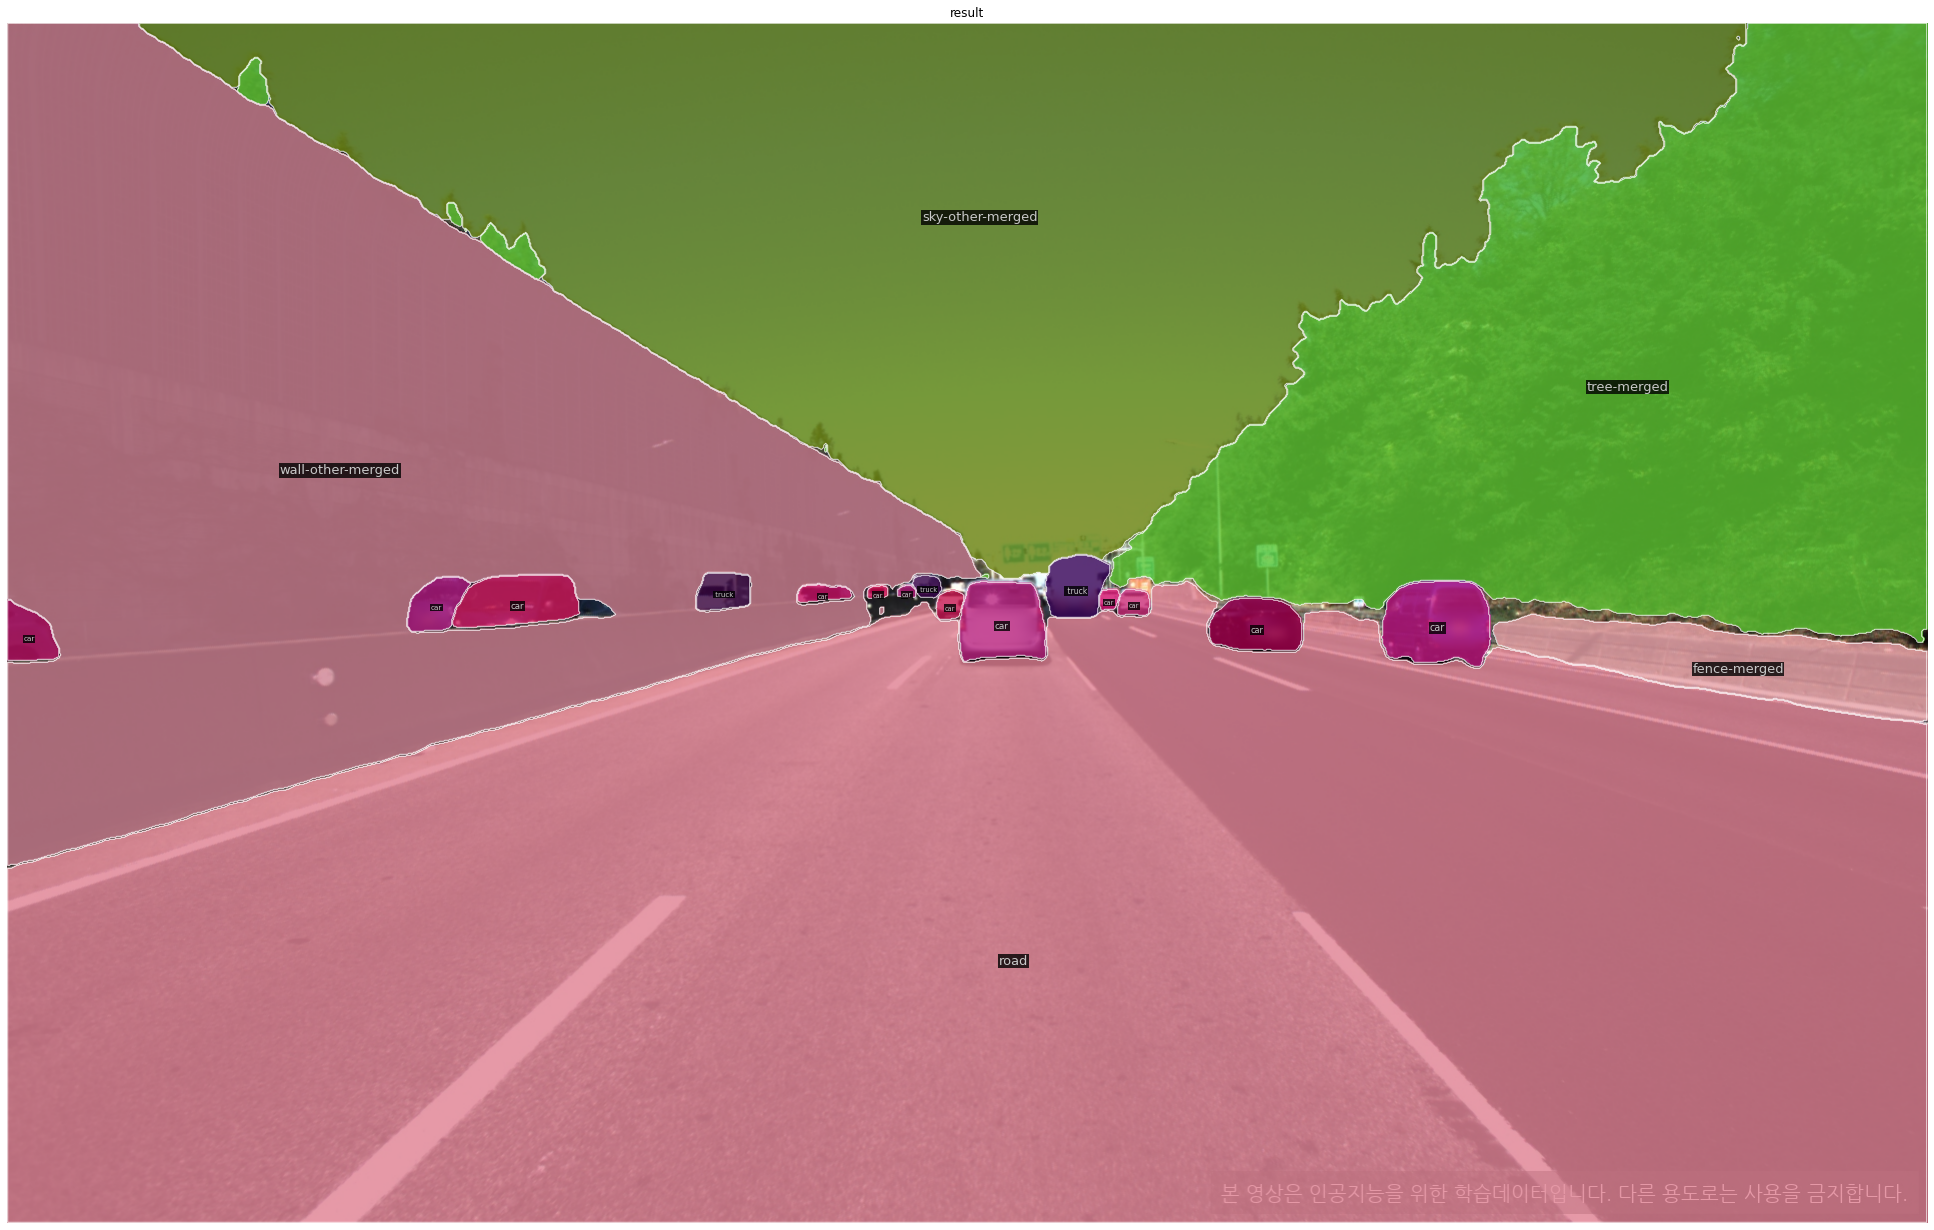

In [63]:
show_result_pyplot(model, rand_img, result)